In [2]:
# Load the Dataset
import pandas as pa

# import Data from .xlsv file
File_path="F:/DS/bird observation project/Bird_Monitoring_Data_FOREST.XLSX"
#Load all Sheet
Forest_birds_sheets=pa.read_excel(File_path,sheet_name=None)
#Combine all sheets in single DataFrame
Forest_df=pa.concat(Forest_birds_sheets.values(),ignore_index=True)

#Display Data
print("Forest Birds Dataset:\n",Forest_df.head())


Forest Birds Dataset:
   Admin_Unit_Code Sub_Unit_Code Site_Name  Plot_Name Location_Type  Year  \
0            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
1            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
2            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
3            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   
4            ANTI           NaN    ANTI 1  ANTI-0036        Forest  2018   

        Date Start_Time  End_Time          Observer  ...  NPSTaxonCode  \
0 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         83803   
1 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         90935   
2 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         84865   
3 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         93634   
4 2018-05-22   06:19:00  06:29:00  Elizabeth Oswald  ...         88394   

  AOU_Code PIF_Watchlist_Status Regional_Stewardship_Status  Temperature  \

EDA

In [3]:
# check for Missing Values 
print("Missing Values of Forest Birds per column\n",Forest_df.isnull().sum())
# Missing value per column
missing_values=Forest_df.isnull().sum()
#Filter columns with missing value
Missing_values_Column=missing_values[missing_values>0]

Missing Values of Forest Birds per column
 Admin_Unit_Code                   0
Sub_Unit_Code                  7824
Site_Name                         0
Plot_Name                         0
Location_Type                     0
Year                              0
Date                              0
Start_Time                        0
End_Time                          0
Observer                          0
Visit                             0
Interval_Length                   0
ID_Method                         1
Distance                         92
Flyover_Observed                  0
Sex                            5183
Common_Name                       0
Scientific_Name                   0
AcceptedTSN                       9
NPSTaxonCode                      0
AOU_Code                          0
PIF_Watchlist_Status              0
Regional_Stewardship_Status       0
Temperature                       0
Humidity                          0
Sky                               0
Wind                 

C:\Users\nsiva\AppData\Local\Temp\ipykernel_9840\1290000445.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.barplot(x=Missing_values_Column.index,y=Missing_values_Column.values,palette="coolwarm")


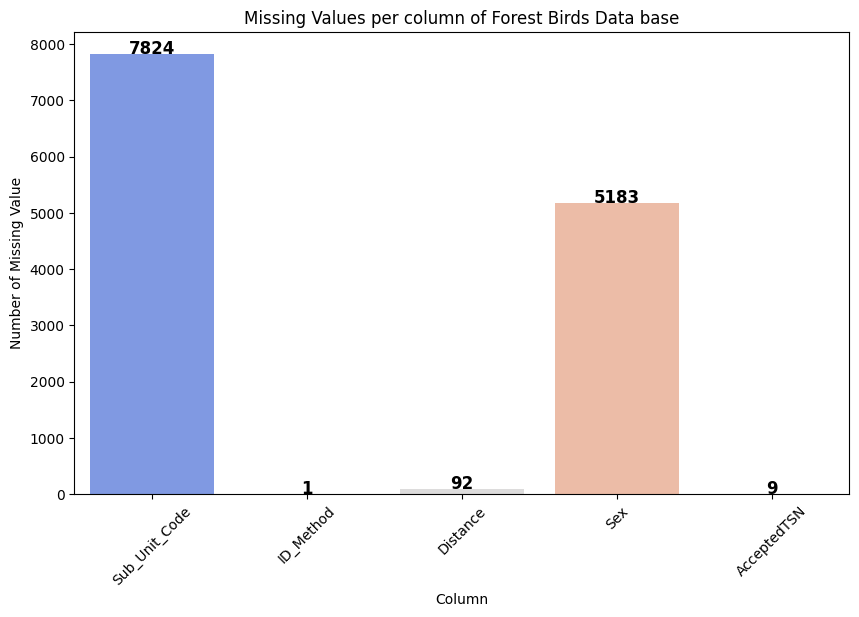

In [4]:
# visualizing the missing value
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
ax=sns.barplot(x=Missing_values_Column.index,y=Missing_values_Column.values,palette="coolwarm")
for i,v in enumerate(Missing_values_Column.values):
    ax.text(i,v+5,str(v),ha="center", fontsize=12, fontweight="bold", color="black")
plt.xticks(rotation=45)
plt.ylabel("Number of Missing Value")
plt.xlabel("Column")
plt.title("Missing Values per column of Forest Birds Data base")
plt.show()


In [5]:
# Drop Missing values column with 50% missing data
Forest_df.dropna(thresh=len(Forest_df)*0.5,axis=1,inplace=True)



In [6]:
#Fill numerical column with mean
Forest_df.fillna(Forest_df.select_dtypes(include=['number']).mean(), inplace=True)

In [7]:
# Fill categorical columns
Forest_df['ID_Method'].fillna(Forest_df['ID_Method'].mode()[0],inplace=True)


C:\Users\nsiva\AppData\Local\Temp\ipykernel_9840\3431804876.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Forest_df['ID_Method'].fillna(Forest_df['ID_Method'].mode()[0],inplace=True)


In [8]:
# Find the count values
Forest_df.count()

Admin_Unit_Code                8546
Site_Name                      8546
Plot_Name                      8546
Location_Type                  8546
Year                           8546
Date                           8546
Start_Time                     8546
End_Time                       8546
Observer                       8546
Visit                          8546
Interval_Length                8546
ID_Method                      8546
Distance                       8454
Flyover_Observed               8546
Common_Name                    8546
Scientific_Name                8546
AcceptedTSN                    8546
NPSTaxonCode                   8546
AOU_Code                       8546
PIF_Watchlist_Status           8546
Regional_Stewardship_Status    8546
Temperature                    8546
Humidity                       8546
Sky                            8546
Wind                           8546
Disturbance                    8546
Initial_Three_Min_Cnt          8546
dtype: int64

In [9]:
# filling missing values
mode_value=Forest_df['Distance'].mode()[0]
Forest_df['Distance'].fillna(mode_value, inplace=True)

C:\Users\nsiva\AppData\Local\Temp\ipykernel_9840\2590147771.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Forest_df['Distance'].fillna(mode_value, inplace=True)


In [10]:
# Round off the values
Forest_df['Temperature']=Forest_df['Temperature'].round(0).astype(int)
Forest_df['Humidity']=Forest_df['Humidity'].round(0).astype(int)

In [11]:
#display sample value upto 3 values
Forest_df.head(3)

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,83803,EATO,False,True,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,90935,WBNU,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,84865,RBWO,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False


In [12]:
# Count of  Duplicates
print(f"Duplicate rows:{Forest_df.duplicated().sum()}")
# Drop the Duplicate values
Forest_df.drop_duplicates(inplace=True)

Duplicate rows:29


In [13]:
Forest_df

,Admin_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,Visit,...,NPSTaxonCode,AOU_Code,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt
0,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,83803,EATO,False,True,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
1,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,90935,WBNU,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True
2,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,84865,RBWO,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
3,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,93634,OROR,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
4,ANTI,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,1,...,88394,NOMO,False,False,20,79,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8541,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,88350,CARW,False,False,21,76,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True
8542,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,87136,AMRO,False,False,21,76,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True
8543,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,85824,ACFL,False,True,21,76,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,False
8544,WOTR,WOTR,WOTR-0001,Forest,2018,2018-07-08,08:13:00,08:23:00,Kimberly Serno,2,...,94228,NOCA,False,False,21,76,Clear or Few Clouds,Light air movement (1-3 mph) smoke drifts,Slight effect on count,True


In [14]:
Forest_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8517 entries, 0 to 8545
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Admin_Unit_Code              8517 non-null   object        
 1   Site_Name                    8517 non-null   object        
 2   Plot_Name                    8517 non-null   object        
 3   Location_Type                8517 non-null   object        
 4   Year                         8517 non-null   int64         
 5   Date                         8517 non-null   datetime64[ns]
 6   Start_Time                   8517 non-null   object        
 7   End_Time                     8517 non-null   object        
 8   Observer                     8517 non-null   object        
 9   Visit                        8517 non-null   int64         
 10  Interval_Length              8517 non-null   object        
 11  ID_Method                    8517 non-null   obj

In [15]:
# Identify Numerical Columns  
num_cols = Forest_df.select_dtypes(include=['number']).columns
print("Numerical Columns:", num_cols)


Numerical Columns: Index(['Year', 'Visit', 'AcceptedTSN', 'NPSTaxonCode', 'Temperature',
       'Humidity'],
      dtype='object')


In [16]:
# Detection of outliers using IQR
import numpy as np

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

# Apply IQR method to all numerical columns
for col in num_cols:
    outliers = detect_outliers_iqr(Forest_df, col)
    print(f"Outliers in {col}: {len(outliers)} rows")




Outliers in Year: 0 rows
Outliers in Visit: 0 rows
Outliers in AcceptedTSN: 1263 rows
Outliers in NPSTaxonCode: 1186 rows
Outliers in Temperature: 70 rows
Outliers in Humidity: 116 rows


In [17]:
# Handle Outliers using IQR
def cap_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[column] = np.where(data[column] < lower_bound, lower_bound,
                            np.where(data[column] > upper_bound, upper_bound, data[column]))
    return data

# Apply capping to all numerical columns
for col in num_cols:
    Forest_df = cap_outliers(Forest_df, col)


In [18]:
Forest_df.to_csv("Forest_Birds_handled_data.csv",index=False)

Data Visualization

C:\Users\nsiva\AppData\Local\Temp\ipykernel_9840\3967811324.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=Forest_df, palette="coolwarm", order=month_order)


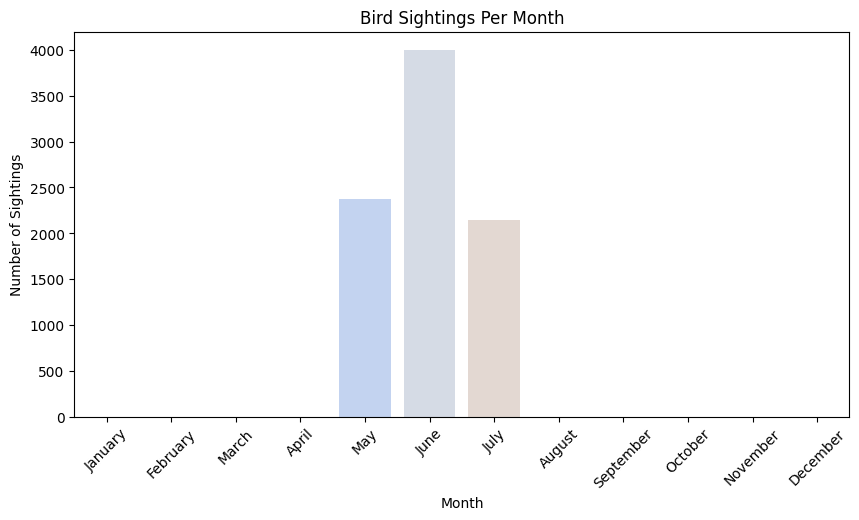

In [18]:
# Bird Sightings accoress months
import matplotlib.pyplot as plt
import seaborn as sns

# convert the data column to dataframe
Forest_df['Date']=pa.to_datetime(Forest_df['Date'], format="%y-%m-%d")

# Extract the month name
Forest_df['Month'] = Forest_df['Date'].dt.strftime('%B')  # Extracts full month name

# Order months correctly for plotting
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]

# Plot Bird Sightings Per Month
plt.figure(figsize=(10, 5))
sns.countplot(x='Month', data=Forest_df, palette="coolwarm", order=month_order)
plt.xlabel("Month")
plt.ylabel("Number of Sightings")
plt.title("Bird Sightings Per Month")
plt.xticks(rotation=45)  
plt.show()



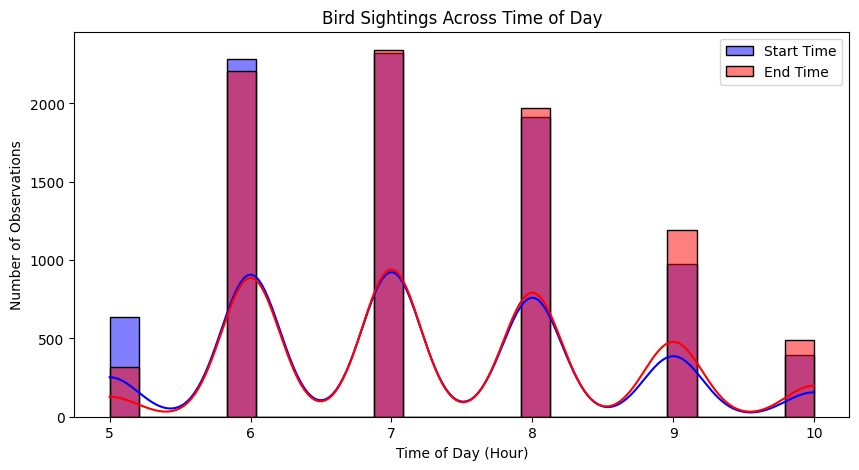

In [19]:
# Bird Activity Based on Start & End Time
# Convert Start_Time and End_Time to datetime format and extract the hour
Forest_df['Start_Time'] = pa.to_datetime(Forest_df['Start_Time'], format='%H:%M:%S').dt.hour
Forest_df['End_Time'] = pa.to_datetime(Forest_df['End_Time'], format='%H:%M:%S').dt.hour

# Plot Bird Activity Based on Start & End Time
plt.figure(figsize=(10,5))
sns.histplot(Forest_df['Start_Time'], bins=24, kde=True, color="blue", label="Start Time")
sns.histplot(Forest_df['End_Time'], bins=24, kde=True, color="red", label="End Time")
plt.xlabel("Time of Day (Hour)")
plt.ylabel("Number of Observations")
plt.title("Bird Sightings Across Time of Day")
plt.legend()
plt.show()

C:\Users\nsiva\AppData\Local\Temp\ipykernel_9840\887079216.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_counts.index, y=location_counts.values, palette="coolwarm")


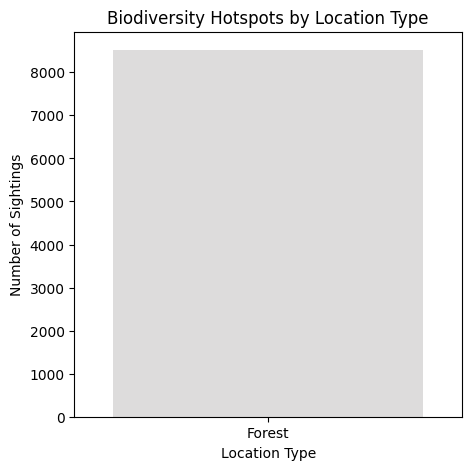

In [20]:
# Group by Location_Type and count sightings
location_counts = Forest_df['Location_Type'].value_counts()

# Plot Biodiversity Hotspots by Location Type
plt.figure(figsize=(5, 5))
sns.barplot(x=location_counts.index, y=location_counts.values, palette="coolwarm")
plt.xlabel("Location Type")
plt.ylabel("Number of Sightings")
plt.title("Biodiversity Hotspots by Location Type")
plt.xticks(rotation=0)  
plt.show()

C:\Users\nsiva\AppData\Local\Temp\ipykernel_9840\3600691640.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_plots.index, y=top_plots.values, palette="viridis")


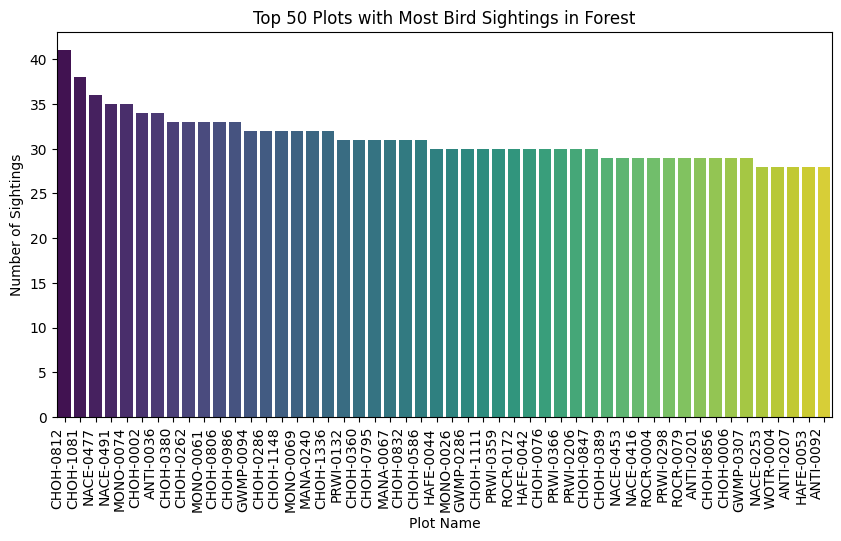

In [21]:
# Select the top 50 most frequent plots
top_plots = Forest_df['Plot_Name'].value_counts().nlargest(50)

# Plot Top 10 Observations by Plot Name
plt.figure(figsize=(10, 5))
sns.barplot(x=top_plots.index, y=top_plots.values, palette="viridis")
plt.xlabel("Plot Name")
plt.ylabel("Number of Sightings")
plt.title("Top 50 Plots with Most Bird Sightings in Forest")
plt.xticks(rotation=90, ha="right")  # Rotate for better visibility
plt.show()



In [22]:
# Count total unique bird species
unique_species_count = Forest_df['Scientific_Name'].nunique()
print(f"Total Unique Bird Species Observed: {unique_species_count}")

Total Unique Bird Species Observed: 108


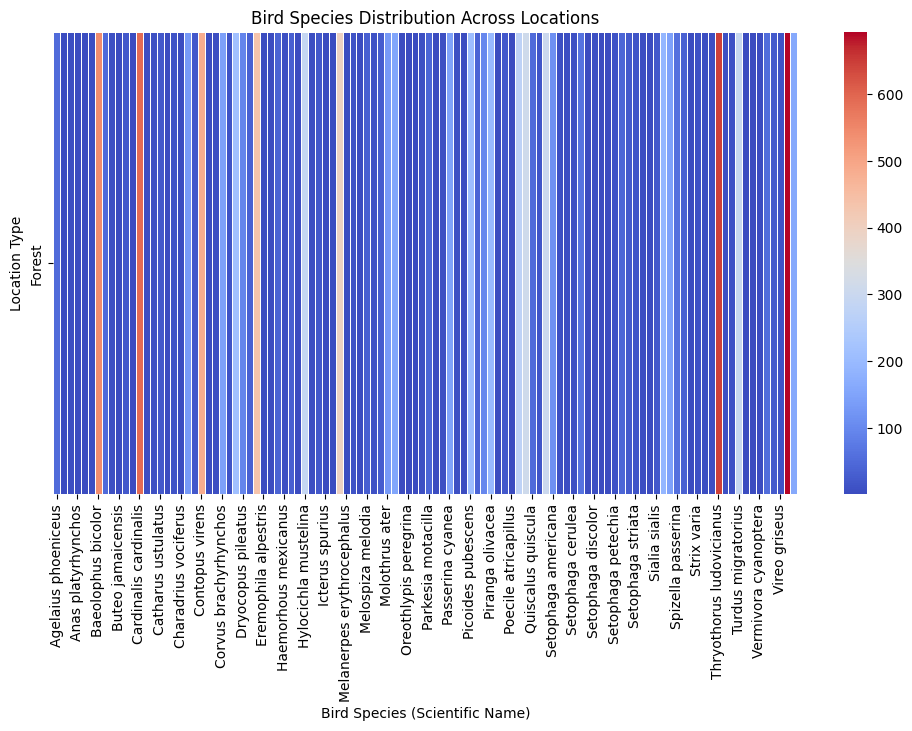

In [23]:
# Create a pivot table for heatmap (rows = Location_Type, columns = Scientific_Name, values = counts)
heatmap_data = Forest_df.pivot_table(index='Location_Type', columns='Scientific_Name', aggfunc='size', fill_value=0)

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5)
plt.xlabel("Bird Species (Scientific Name)")
plt.ylabel("Location Type")
plt.title("Bird Species Distribution Across Locations")
plt.show()


<Axes: xlabel='ID_Method', ylabel='count'>

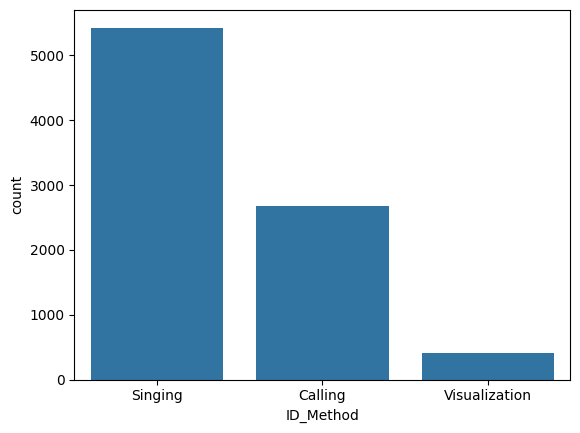

In [24]:
# Method used to identify the species and counts
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x="ID_Method",data=Forest_df)

<Axes: xlabel='Observer', ylabel='count'>

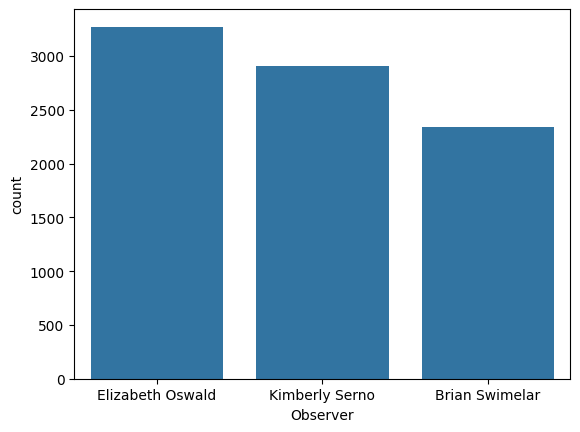

In [26]:
# Number of Observation count of Observer
sns.countplot(x='Observer',data=Forest_df)